### Neshyba, 2022
# Non-PV work

## Key equations

The general form of non-PV work we're considering here is

$$
w' = \int_{z_1}^{z_2} f dz \ \ \ (1)
$$

where we're thinking about moving a molecule or ion along some path against a force given by $f(z)$. The specific form $f(z)$ takes depends on the nature of the force. If this were an Intro Physics course, we'd be talking about lifting up an object some distance  against the force of gravity, so $f = mg$. The same idea will work here, only we'll be concerned with molecular-scale forces, such as the following:

### Electrical work

To describe the electrical work associated with moving around ions in the presence of an electric field, we can use

$$
f(z) = Q {d \phi \over dz} \ \ \ (2)
$$

where $Q$ is the charge on an ion. (I just realized we also used $Q$ for the reaction quotient. Sorry about that.) $\phi$, meanwhile, is the *electrical potential*, assumed to be some function of position $z$. 

If we combine Eqs. (1) and (2), we find that they simplify to 

$$
w' = Q \Delta \phi \ \ \ (3)
$$

where $\Delta \phi = \phi_2 - \phi_1$. 

In a very simple situation, we'd be talking about moving a single ion, like a proton, in which case we'd use $Q=1.6 \times 10^{-19}C$. What if we have $N$ ions? That's easy, it just adds up:

$$
w' = N Q \Delta \phi \ \ \ (4)
$$

And what if we're talking about polyvalent ions? That's easy too, you adjust for the charge. For example, to calculate the work associated with moving a $Ca^{2+}$ ion up-gradient across an electrical potential difference of $\Delta \phi$, you'd use Eq. (3), with $Q=2 \times 1.6 \times 10^{-19}C$.

If we want to talk about *moles* of monovalent ions, the results just given can be written

$$
w' = n F \Delta \phi \ \ \ (5)
$$

where we have used the fact that $F=9.65 \times 10^4 {C \over mole}$ is the charge on an Avogadro's number of monovalent ions (all $6.02 \times 10^{23}$ of them!). And adjusting for polyvalent ions works the same way it did for individual ions.


### Concentration work

There's also work associated with moving molecules across a *concentration gradient*, as shown in Fig. (1).

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/chempot figure 1.jpg" height="700" width="700"/>  

__Figure 1__. Concentration work. 
</p>

In this case, the force appearing in Eq. (1) is given by

$$
f(\varepsilon) = RT {1 \over c}{dc \over d \varepsilon } \ \ \ (6)
$$

where we've written this on a per-mole basis, and used a non-dimensional quantity, $\varepsilon$, as our measure of distance. Inserting this into Eq. (1), we get

$$
w' = RT \int_0^1 {1 \over c}{dc \over d \varepsilon } d\varepsilon \ \ \ (7)
$$

To use this equation, you'd have to specify how the concentration changes along the path your particle takes in getting from $c_1$ to $c_2$, and you'd have to find the derivative of that function too (${dc \over d \varepsilon }$, also called the *Jacobian*). You'll be working with two such paths in this exercise. 

Two more notes about this: 

1. We talk about moving molecules or ions *up-gradient* when the process is thermodynamically unfavorable. The opposite of this are *down-gradient* processes, processes that are thermodynamically *favorable*, which we associate with spontaneous processes. So for example, moving protons from a place in a cell where the pH is high (low concentration of protons) into a place where the pH is low would be unfavorable, but protons would move spontaneously in the opposite direction.
1. It turns out that some cellular process involve both types of non-PV work simultaneously, i.e., electrical work *and* concentration work. In that case, you just add up the two contributions. So if you are a *very* clever cell, you could drive an unfavorable process, like moving protons from high pH to low pH, by setting things up so that this movement is even more *favorable* in terms of electrical work. 


## Learning Goals
1. I can write the "forces" associated with electrical and concentration non-PV work.
1. I can numerically integrate those forces to obtain values of the work for given paths. 
1. I can transform integrals to (attempt to) convert integrals into path-independent form.

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
R = AssignQuantity(8.314, 'J/mol/K')
T = AssignQuantity(310,'K') # Physiological temperature

### Moving an $H^+$ ion up an electrical potential
Suppose you move an $H^+$ ion up an electrical potential of 0.1 Volts. What's the work done? Express your answer in Joules; if you get a tiny number, that's possibly OK because the charge on a single $H^+$ ions is, let's face it, a very tiny $1.6 \times 10^{-19} C$.

In [4]:
### BEGIN SOLUTION
Q = AssignQuantity(1.6e-19,'C')
deltaphi = AssignQuantity(0.1,'V')
work = Q*deltaphi
print(work)
work.ito('J')
print(work)
### END SOLUTION

1.6e-20 coulomb * volt
1.6e-20 joule


### Moving multiple $H^+$ ions up an electrical potential
Suppose you move *five* $H^+$ ions up an electrical potential of 0.1 Volts. What's the work done? Express your answer in Joules.

In [5]:
### BEGIN SOLUTION
Q = AssignQuantity(1.6e-19,'C')
deltaphi = AssignQuantity(0.1,'V')
work = 5*Q*deltaphi
print(work)
work.ito('J')
print(work)
### END SOLUTION

8.000000000000001e-20 coulomb * volt
8.000000000000001e-20 joule


### Moving a mole of $H^+$ ions up an electrical potential
Suppose the electrical potential of an intermembrane space is 0.17 V greater than that of the matrix. Find the electrical work ($w’$) required to move one mole of $H^+(aq)$ from the matrix and into the intermembrane space. It will be handy to recall (from the Introduction) that the charge on an Avogadro's number of $H^+$ ions is $F=9.65 \times 10^4 {C \over mole}$. Express your answer in kJ.

In [6]:
### BEGIN SOLUTION
n = AssignQuantity(1,'mol')
F = AssignQuantity(9.65e4,'C/mol')
deltaphi = AssignQuantity(0.17,'V')
work = n*F*deltaphi
print(work)
work.ito('kJ')
print(work)
### END SOLUTION

16405.0 coulomb * volt
16.405 kilojoule


### Work against a concentration gradient, Part 1: Linear gradient
Suppose a biological cell transports a mole of $H^+$ ions at $pH=8$ across a membrane into a region having $pH=7$. Equation (7) gives us the formal expression for this, but how do we actually get a number? Let's break this down step by step. 

Step 1. You'll need starting and finishing concentrations of $H^+$ for your path. You can get those using relationship $c = 10^{-pH}$ (where $c$ is in units $\underline M$).

Step 2. You'll also need an array of numbers that represent values of $\varepsilon$ along your path. If you wanted a 1000 such numbers, you could say 

        eps = np.linspace(0,1,1000)  
    
Step 3. You'll need to specify exactly how the concentration of $H^+$ changes from $c_1$ to $c_2$ along that path. For starters, we'll assume a linear gradient, e.g., $c(\varepsilon)= c_1+\varepsilon \times (c_2-c_1)$.

Step 4. You'll also need to calculate the ${dc \over d\varepsilon}$ term in Eq. (7). For the linear gradient just mentioned, that would be ${dc \over d\varepsilon} = (c_2-c_1)$

Step 5. It's handy to construct an array that is the integrand appearing in Eq. (7), something like 

        integrand = R*T/c*dc_deps
        
Step 6. You might recall that Numpy's numerical integrator is called np.trapz. Its syntax is something like 

        w = np.trapz(integrand,eps)

<IPython.core.display.Javascript object>


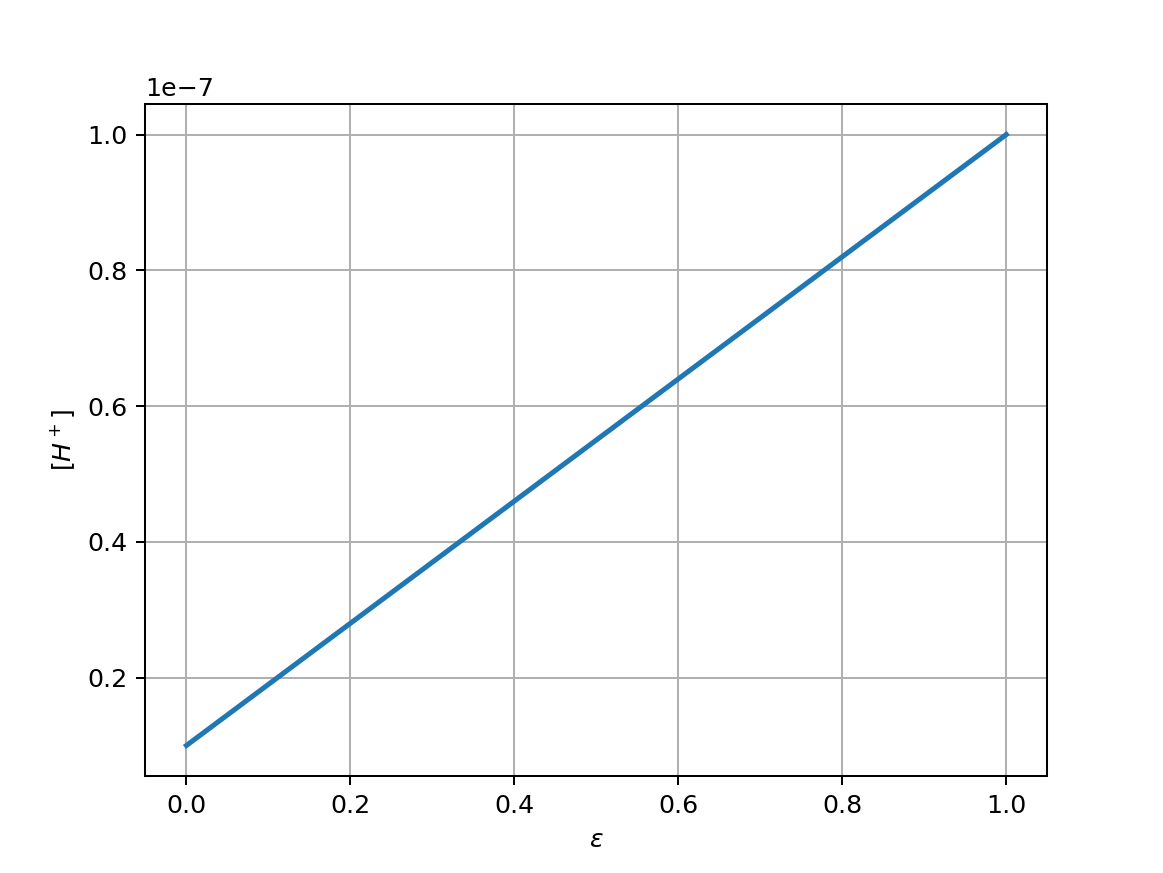

Reversible work for path 1 is 5.93456192100825 kilojoule / mole


In [7]:
# Step 1. Specify the starting and ending concentrations (c1 and c2) of H+, in molarity, based on the pH
### BEGIN SOLUTION
c1 = 10**(-8)
c2 = 10**(-7)
### END SOLUTION

# Step 2. Use np.linspace to lay out a variable, "eps", that runs from zero to one, with 1000 points
### BEGIN SOLUTION
eps = np.linspace(0,1,1000)
### END SOLUTION

# Step 3. Define the concentration as a simple linear path from c1 to c2, and plot it as a function of eps
### BEGIN SOLUTION
c = c1 + eps*(c2-c1)
plt.figure()
plt.plot(eps,c,linewidth=2)
plt.xlabel(r'$\varepsilon $')
plt.ylabel('[$H^+$]')
plt.grid(True)
### END SOLUTION

# Step 4. Calculate the Jacobian
### BEGIN SOLUTION
dc_deps = c2-c1
### END SOLUTION

# Step 5. Form the integrand (including the Jacobian)
### BEGIN SOLUTION
integrand = R*T/c*dc_deps
### END SOLUTION

# Step 6. Integrate using np.trapz, and report the results in kJ/mol
# see https://numpy.org/doc/stable/reference/generated/numpy.trapz.html for a refresher on trapz
### BEGIN SOLUTION
w = np.trapz(integrand,eps)
w.ito('kJ/mol')
print("Reversible work for path 1 is", w)
### END SOLUTION

### Work against a concentration gradient, Part 2: Non-linear gradient
This is like what you just did, but assuming the concentration of $H^+$ rises as a *nonlinear* function of $\epsilon$. Here's one possibility (replacing steps 3 & 4 above):

Step 3'. Specify concentrations of $H^+$ from $c_1$ to $c_2$ as a *quadratic* function, e.g., $c(\varepsilon)= c_1+\varepsilon^2 \times (c_2-c_1)$.


Step 4'. Specify ${dc \over d\varepsilon}$ for the quadratic gradient just mentioned as ${dc \over d\varepsilon} = 2 \varepsilon (c_2-c_1)$


<IPython.core.display.Javascript object>


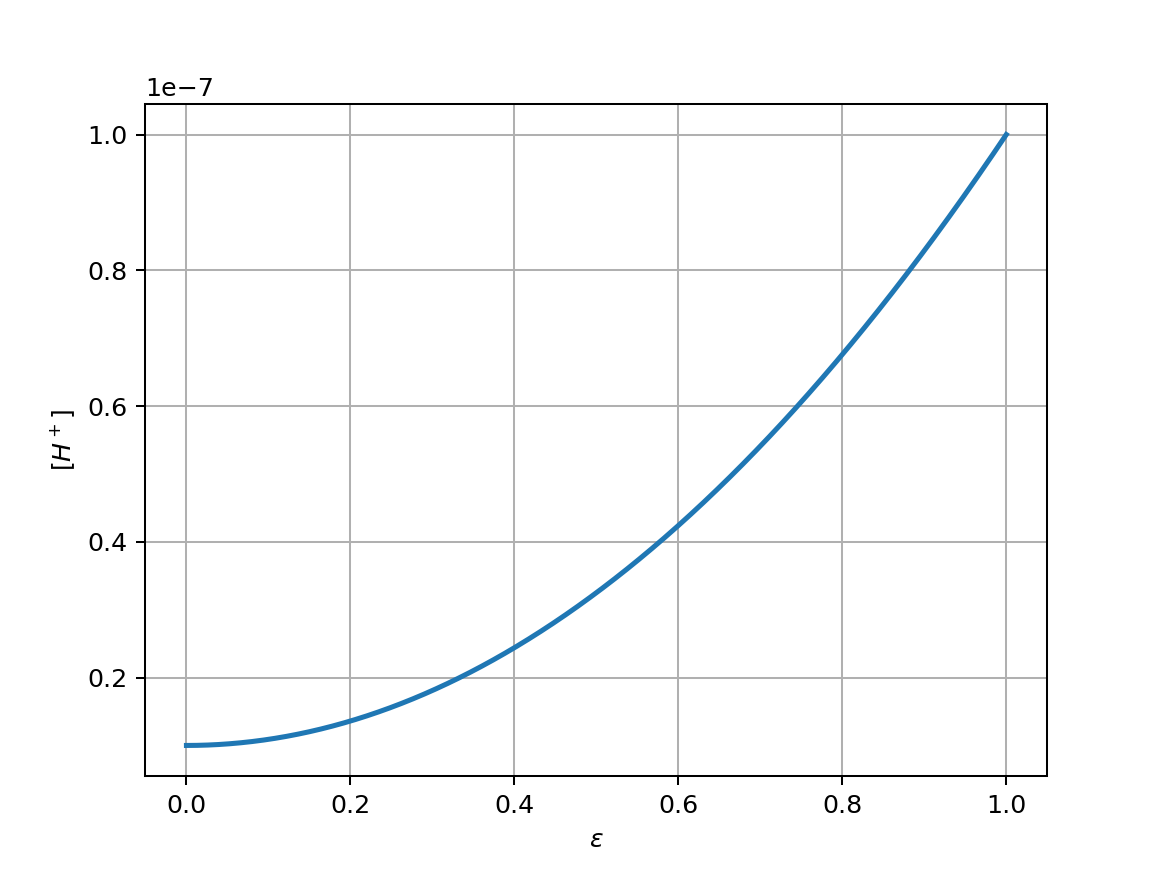

Reversible work for path 1 is 5.934540479919866 kilojoule / mole


In [8]:
# Step 1. Specify the starting and ending concentrations (c1 and c2) of H+ based on the pH
c1 = 10**(-8)
c2 = 10**(-7)

# Step 2. Use np.linspace to lay out a variable, "eps", that runs from zero to one, with 1000 points
eps = np.linspace(0,1,1000)

# Step 3'. Define the concentration as a quadratic path from c1 to c2, and plot it as a function of eps
### BEGIN SOLUTION
c = c1 + eps**2*(c2-c1)
plt.figure()
plt.plot(eps,c,linewidth=2)
plt.xlabel(r'$\varepsilon $')
plt.ylabel('[$H^+$]')
plt.grid(True)
### END SOLUTION

# Step 4'. Calculate the Jacobian
### BEGIN SOLUTION
dc_deps = 2*eps*(c2-c1)
### END SOLUTION

# Step 5. Form the integrand (including the Jacobian)
integrand = R*T/c*dc_deps

# Step 6. Integrate using np.trapz, and report the results in kJ/mol
w = np.trapz(integrand,eps)
w.ito('kJ/mol')
print("Reversible work for path 1 is", w)

### Pause for analysis
To how many significant figures do these two results agree?

### Work against a concentration gradient, Part 3: Analytical solution
As a last step, let's compare the results of your numerical integration (using np.trapz) to analytical results. An easy way to do the latter is to note that we can carry out a change-of-variables transformation of the integral appearing in Eq. (7), to

$$
w' = RT \int_{c_1}^{c_2}{dc \over c}
$$

Your task: solve this integral analytically (using pen and paper), and use your result in the cell below to evaluate the work done (in kJ/mol).

In [9]:
### BEGIN SOLUTION

w_analytical = R*T*np.log(c2/c1)
w_analytical.ito('kJ/mol')
print(w_analytical)

### END SOLUTION

5.934544663577274 kilojoule / mole


### Pause for analysis
To how many significant figures does your *analytical* result agree with the *numerical* results you got previously? 

### Refresh/save/validate/close/submit/logout